# Week 16 In-Class Assignment


1) Work to improve the model performance for the diabetes decision tree we created in class. You should be able to improve the precision and recall to be above .8 and .7 respectively. You can improve the preprocessing OR alter the model itself.

Here, I'm including the code for the decision_trees notebook as a reference. You can see that, with the parameters as given, the precision is 0.79 and the recall is 0.88


In [1]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import pydotplus

from IPython.display import Image

diabetes_df = pd.read_csv("../week_13/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [3]:
# decision tree classifier
# deep and complex trees tend to overfit, so we want to generaalize and have
# reasonably simple trees as much as possible.

model = tree.DecisionTreeClassifier(max_depth = 10, random_state=42)

In [4]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [5]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[132  18]
 [ 35  46]]


In [6]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       150
           1       0.72      0.57      0.63        81

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231



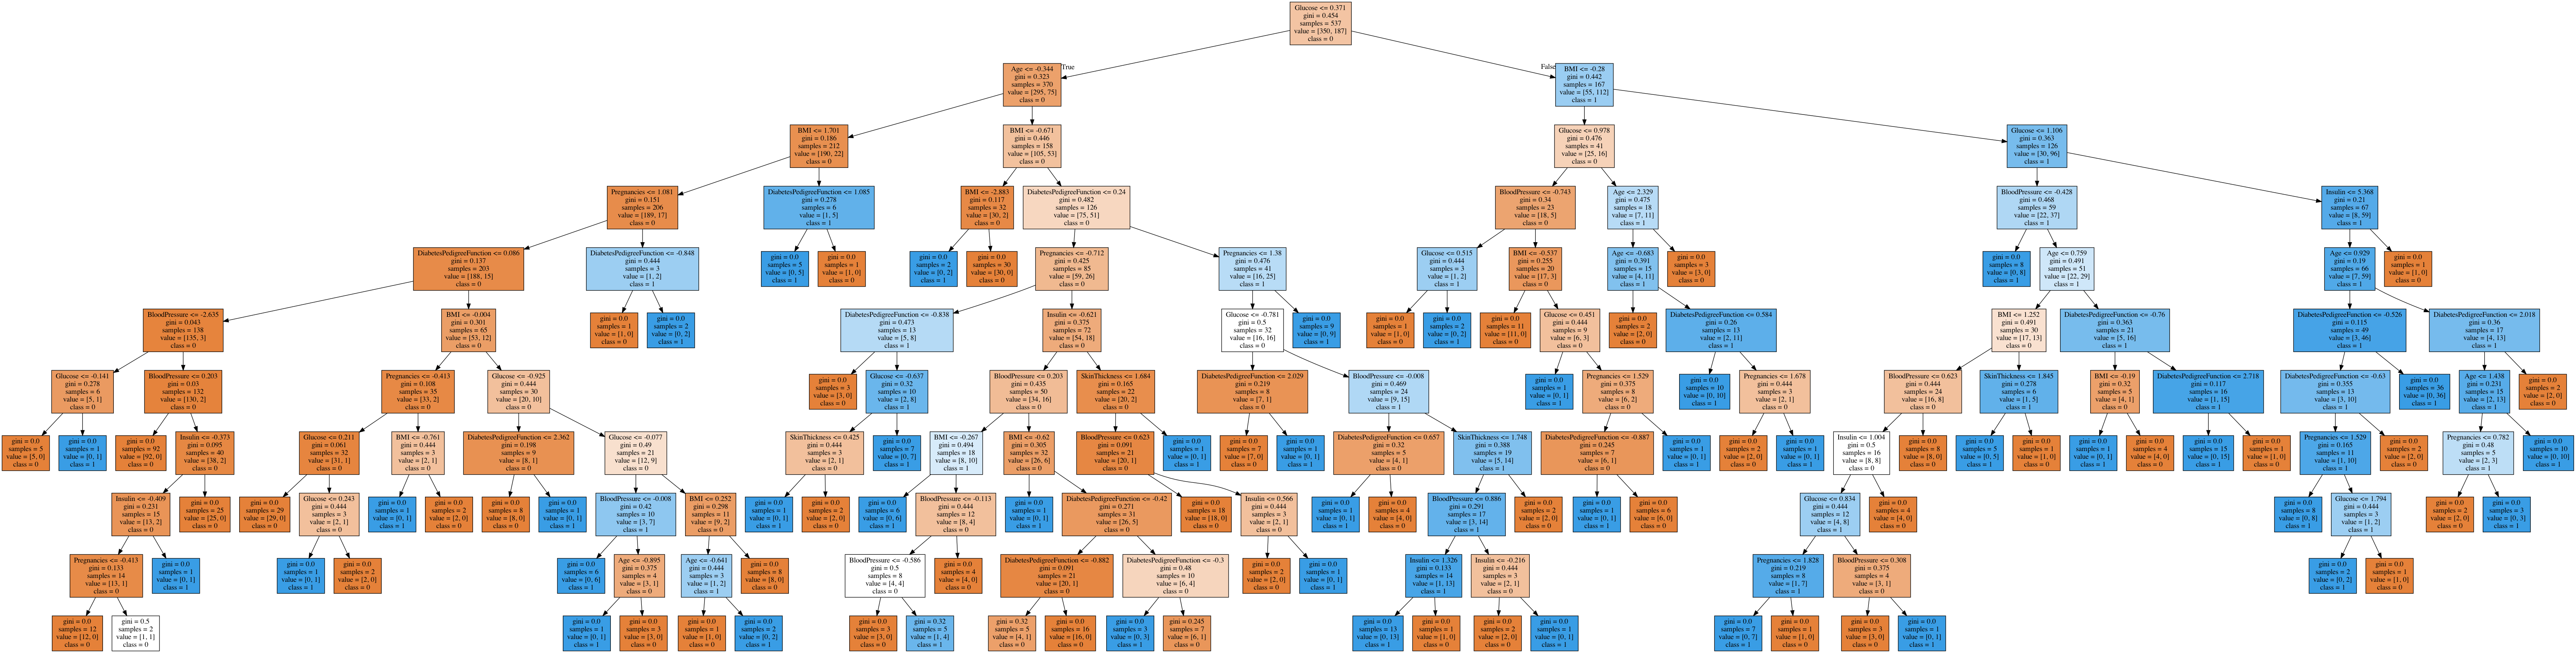

In [7]:
dot_data = tree.export_graphviz(
    model, out_file =None, feature_names=X.columns, class_names = ["0","1"], filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

ANSWER:

One simple and quick approach to improving the model performance is by adjusting the max_depth parameter. Why do this? Fundamentally, by reducing the max_depth of a decision tree, we reduce model complexity, thereby reducing the tendency for overfitting. (As we can see above, the original model is an overfitted one). After playing around a bit, a max_depth = 6 was the highest number less than ten that resulted in a precision above 0.8 and recall above 0.7. 

In [8]:
# new decision tree classifier

In [9]:
model1 = tree.DecisionTreeClassifier(max_depth = 6,random_state=42)

In [10]:
model1 = model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       150
           1       0.81      0.57      0.67        81

    accuracy                           0.80       231
   macro avg       0.80      0.75      0.76       231
weighted avg       0.80      0.80      0.79       231



Below, for contrast, I display the simpler model: 

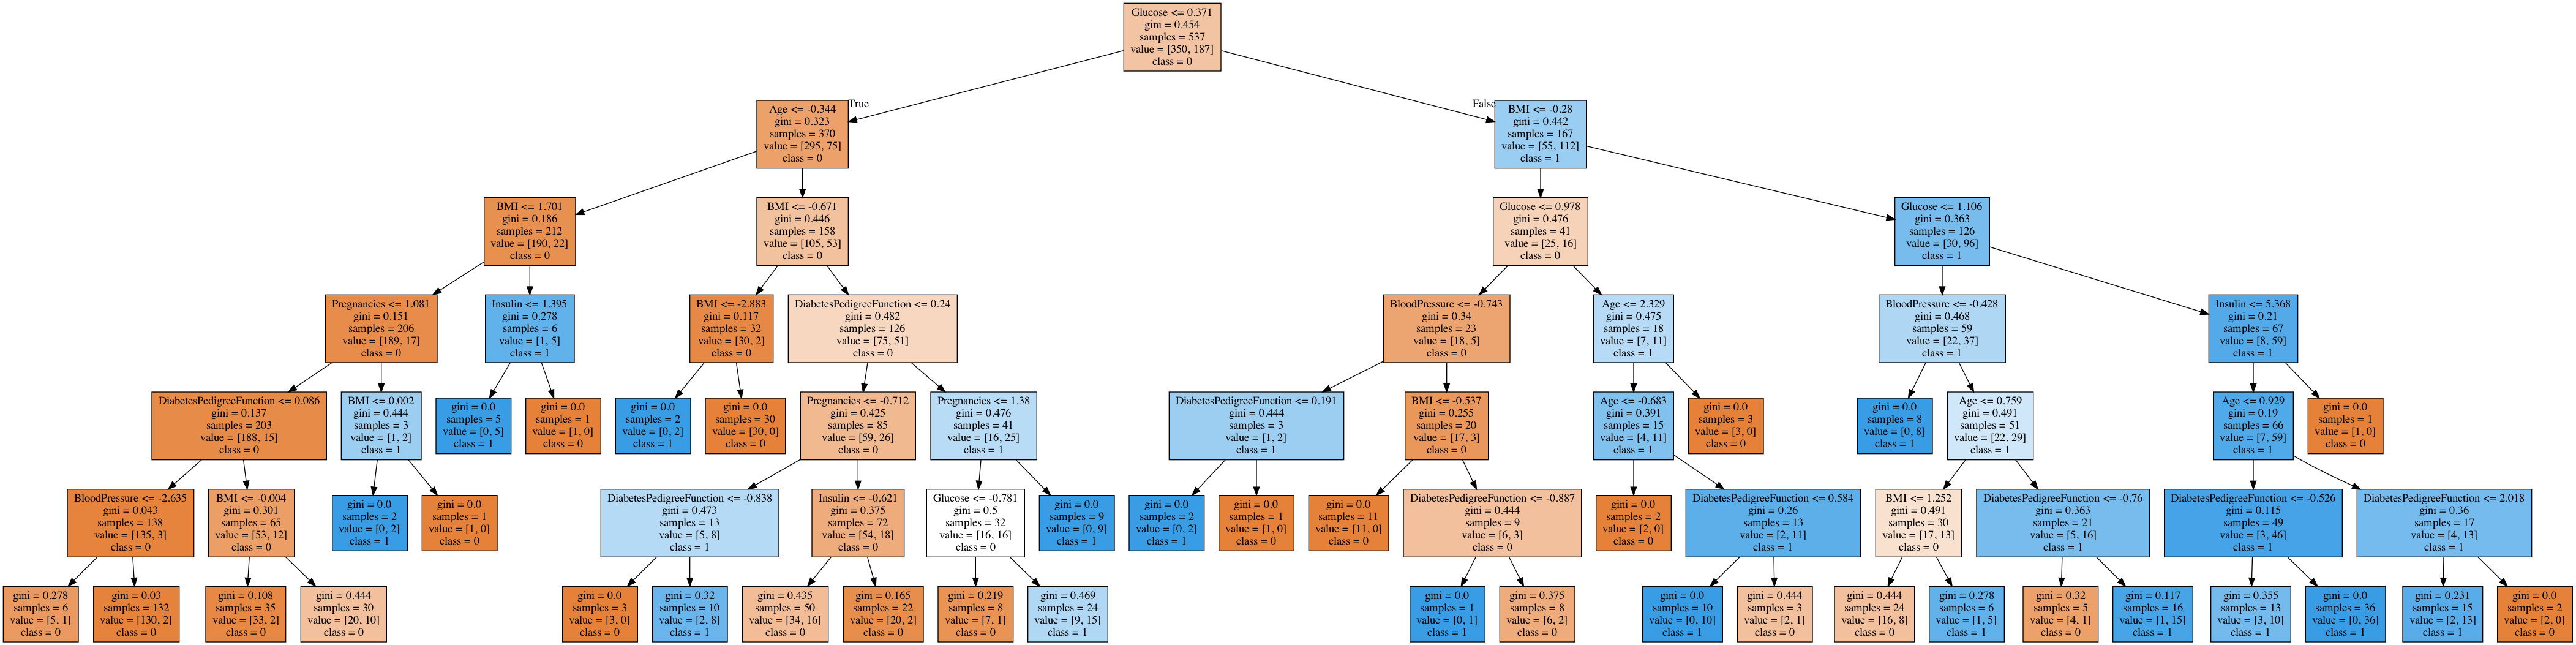

In [12]:
dot_data = tree.export_graphviz(
    model1, out_file =None, feature_names=X.columns, class_names = ["0","1"], filled = True)
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

2) Create a function that accepts an array of names and returns a string formatted as a list of names separated by commas EXCEPT for the last two names, which are separated by an ampersand (and sign - &)

In [13]:
# Input list (of dictionaries): 
classmates =  [{'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'}] 


In [14]:
#print(classmates)

In [15]:
#The function for formatting the returned string.

def format_names(names):
    
    #start with an empty string; this will be returned as output
    str = ''                     

    #firstm make sure we're not working with an empty list
    if len(names) !=0:   
        
        #initialize empty array
        arr = []     
        
        #now, we'll iterate over the list:
        for i in range(0, len(names) -1):
            
            #we're going to add to the array the ith name, the value in the key/value pair
            arr.append(names[i]['name'])  
         
        #we use the "join" method to add the comma and space after the ith name. 
        str = ', '.join(arr)              
        
        #Check the condition that the string is not empty, if true, to existing string, add ampersand flanked by spaces, and last name value in list passed to function.
        str += ' & ' + names[-1]['name'] if str != '' else names[-1]['name']
        
    return str    

In [16]:
print(format_names(classmates))

Nichole, Tanisha & Maggie


In [17]:
classmates_2 = [{'name': 'Nichole'}, {'name': 'Tanisha'}] 

In [19]:
print(format_names(classmates_2))

Nichole & Tanisha


In [20]:
classmate = [{'name': 'Nichole'}]

In [21]:
print(format_names(classmate))

Nichole


As you can see, this function works for lists shorter than the original given list.